# Week 04 - Viz and Encodings

Last week we focused on some of the tools that we will use in the data mining cousre.  We explred the numpy and pandas libraries and learned about notebooks.  This week we will start to investigate how to visualize data.

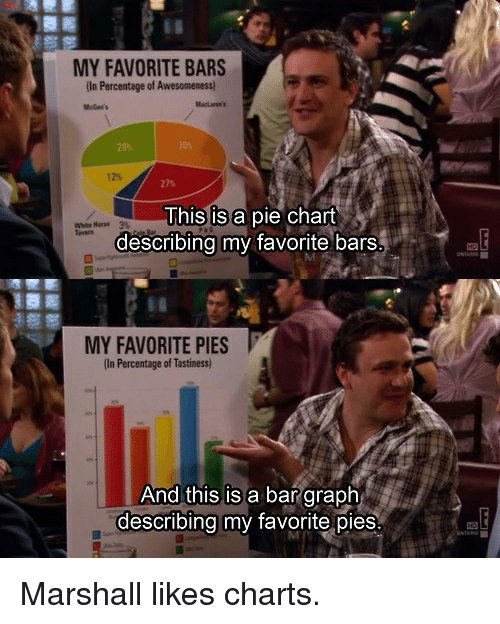

From [https://me.me/i/my-favorite-bars-in-percentage-of-awesomeness-l-this-is-2074085] ... but really from "How I Met Your Mother"

To get started, let's add scikit-learn into our environment.  Scikit-learn has lots of functionality, but for now, we really just want to to make loading data sets easier. 

Use conda to get into your environment

    conda activate csci347

In the terminal run

    conda install scikit-learn
    


## A toy data set

Now let's use this to get the most famous data set of all time.  Let's start by adding a few imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

That new last line imports the datasets module form sklearn.  There are lost of real and toy data sets in here that are great for trying out techniques.  See [sklearn.datasets](https://scikit-learn.org/stable/datasets.html) for more info.  Today, we will explore the iris data set.

In [ ]:
iris_data = datasets.load_iris()
print(iris_data['DESCR'])

Cool!  So we can investigate the description and find out lots about this data set.  In sklearn, the dats set loading utilites have a 'DESCR' attribute, which gives us some nice information about the data set.  Now, let's explore the data.

In [ ]:
data = iris_data['data']

First, let's get some information about the data

In [ ]:
print("the type is", type(data))
print("the shape is", data.shape)
print("the len is", len(data))
print("the numver of dimensions is", np.ndim(data))
print("the first 5 entries are:\n", data[:5,])

It is helpful to know what those columns are:

In [ ]:
features = iris_data['feature_names']
features

Note that in the data description, we have 4 data attributes and 1 predictive attribute.  Let's look at the predictive attribute

In [ ]:
target = iris_data['target']
print("the entries interget are:\n",target)

So we can look at the unique set of values as:

In [ ]:
np.unique(target)

But what does that mean?  Let's use `target_names`!

In [ ]:
target_names = iris_data['target_names']
target_names

## Simple plotting

Let's add a basic library for plotting!  There are lots of options, but the simplest and most core library is matplotlib.  Hop over to the shell and add it to our environment

    conda install matplotlib
    
Once that is done installing, you can import

In [ ]:
import matplotlib.pyplot as plt

Note that a lot of times, you will see matplotlib examples that just have `plt`... those assume that you have imported pyplot as plt.  **Note** names like plt, np, pd, there are just aliases.  You can import these modules with whatever name you like.  It just so happens most tend to use the same name, so it can be easier to collaborate with others if you use the names that most of the community uses.

So the simplest plot that we can do is a scatter plot.  Let's create a scater plot of the "sepal length" and "sepal width".  As those are the first two attributes, we can get them as follows 

In [ ]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel(features[0])
plt.ylabel(features[1])

Note that we used the `xlabel` and `ylabel` functions to lable the axis.  As a rule of thumb, labeling axis is a good habbit to get in to.  Consider the following plot

In [ ]:
plt.scatter(data[:,0], data[:,1])

Without the context of the lables, it is not clear what we are looking at.  Just like when you write code, it may seem that you will remember, but when you come back to your work after eating a sandwitch, you will have no idea what you are looking at.

Recall that for each point, we have label.  Often, when exploring labeled data, it can be convenient to visualize the data where each point is colored by label.  We can use the `c` parameiter to color our points

In [ ]:
plt.scatter(data[:,0], data[:,1], c=target)
plt.xlabel(features[0])
plt.ylabel(features[1])

We could also look at other dimension combinations

In [ ]:
def scatter_plot(x, y):
    plt.scatter(data[:,x], data[:,y], c=target)
    plt.xlabel(features[x])
    plt.ylabel(features[y])

scatter_plot(0, 1)

In [ ]:
scatter_plot(0, 2)

And, let's get fancy and plot all of them!  Here we will remove the lables because they become messy, 

In [ ]:
num_features = data.shape[1]
for i in range(num_features):
    for j in range(i):
        plt.subplot(num_features, num_features, j*num_features+i)
        plt.scatter(data[:,i], data[:,j], c=target) 
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)

plt.suptitle('All projections of the Iris dataset')

Great!  Let's get the first two attrributes and each labeled data set on their own for some plotting fun!

In [ ]:
fig, ax = plt.subplots()
for i, _ in enumerate(target_names):
    di = data[target==i]
    ax.scatter(di[:,0], di[:,1], label=iris_data['target_names'][i])
ax.legend();

In [ ]:
x = 0
y = 1

fig, ax = plt.subplots()

di = data[target==0]
ax.scatter(di[:,x], di[:,y], marker='*', label=iris_data['target_names'][0], )

di = data[target==1]
ax.scatter(di[:,x], di[:,y], marker='^', label=iris_data['target_names'][1], )

di = data[target==2]
ax.scatter(di[:,x], di[:,y], marker='v', label=iris_data['target_names'][2], )

ax.legend();
plt.xlabel(features[x])
plt.ylabel(features[y])

In [ ]:
x = 0
y = 1
symbols = ['*', '^', 'v']

fig, ax = plt.subplots()
for i, _ in enumerate(iris_data['target_names']):
    di = data[target==i]
    ax.scatter(di[:,x], di[:,y], marker=symbols[i], label=iris_data['target_names'][i])

ax.legend();
plt.xlabel(features[x])
plt.ylabel(features[y])

Let's get the counts of each type and then display it in a bar plot 

In [ ]:
counts = [sum(target==0), sum(target==1), sum(target==2)]
plt.bar(target_names, counts)

One other thing I like to do to try things out is to just make some data.  For example let's check out the histogram of nomally distrubted data cetered around 10.

In [ ]:
mu, sigma = 10, 1
x = mu + sigma * np.random.randn(10000)
_ = plt.hist(x, 50)


Or just plotting a linear function

In [ ]:
x = np.linspace(-10, 10, num=250)
y = x**3
plt.plot(x, y)

This just scratched the surface and hopefully, this got you started and you are interested in exploring more!  The best way to learn more is to look at the code for plots that you like!  You can find great examples at https://matplotlib.org/stable/gallery/index.html

If you prefer more of a tutorial approach, check out https://matplotlib.org/stable/tutorials/index.html.

We have covered a lot of ground today (and added a lot of dependencies.  Let's capture our environment so that we don't have to re-create it if our systems go down:

    conda env export > environment.yml

Next time we will:
- look at how to encode categorical variables 
- a few tools for preprocessing data
- a few more advanced viz examples (time permitting)